### Exploratory Analysis

In [22]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
food = pd.read_csv('food_coded.csv')

In [28]:
df2 = food[['GPA', 'Gender' , 'calories_chicken', 'turkey_calories', 'income', 'employment', 'father_education', 'mother_education', 'grade_level', 'eating_out', 'on_off_campus', 'weight', 'cook','cuisine', 'exercise', 'drink','breakfast', 'parents_cook']]

In [70]:
# making variable of the % correct. we could not find the other actual calorie counts of others
df2['calories_chicken_prop'] = df2['calories_chicken']/720
df2['calories_turkey_prop'] = df2['turkey_calories']/690

In [71]:
# Cleaning GPA, making bins
df2['GPA'] = df2['GPA'].str[:3]
df2['GPA'].replace(['Per','Unk'], None, inplace=True)
df2['GPA'].value_counts()
df2['GPA'] = df2['GPA'].astype(float)

In [72]:
def plotting(plot, title, xlabel, ylabel,legend):
    plot.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legend)

## What type of students make better guesses for food calories? 
Guessing proportion of chicken & turkey vs:
- GPA
- family education
- income
- cook 
- living situation 
- eating out
- exercising


In [75]:
corr_columns = df2[['GPA','income','employment','father_education', 'mother_education', 'grade_level', 'eating_out','cook', 'exercise','calories_chicken_prop','calories_turkey_prop']]
corr_columns.corr()['calories_chicken_prop'].sort_values(ascending=False)

calories_chicken_prop    1.000000
calories_turkey_prop     0.397642
income                   0.144076
GPA                      0.140987
grade_level              0.113915
eating_out               0.024428
father_education         0.008014
cook                    -0.040738
employment              -0.057861
mother_education        -0.064962
exercise                -0.106730
Name: calories_chicken_prop, dtype: float64

In [76]:
corr_columns.corr()['calories_turkey_prop'].sort_values(ascending=False)

calories_turkey_prop     1.000000
calories_chicken_prop    0.397642
GPA                      0.237495
income                   0.133007
grade_level              0.127848
eating_out               0.090734
father_education         0.049771
employment               0.020998
cook                     0.020644
mother_education         0.007524
exercise                -0.025442
Name: calories_turkey_prop, dtype: float64

Based off these correlations, I will choose to investigate GPA, income, grade_level, eating_out, exercise, and mother_education. I will also investigate cooking habits because I would assume that this type of behavior would influence someones ability to guess calories.

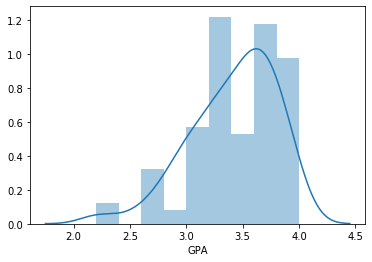

In [9]:
# GPA 
sns.distplot(df2['GPA'].dropna())

#### GPA vs. Calorie Guessing
Plotting GPA vs average proportion guesses. We chose mean because all the values have same ranges of proportions.

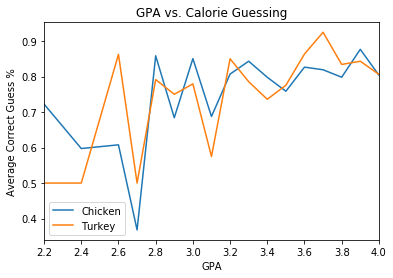

In [10]:
plotting(df2.groupby('GPA').mean()['calories_chicken_prop'], 'GPA vs. Calorie Guessing', 'GPA', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('GPA').mean()['calories_turkey_prop'], 'GPA vs. Calorie Guessing', 'GPA', 'Average Correct Guess %', ['Chicken','Turkey'])

From this plot, we can conclude that typically, students with better academic performance (GPA), are better at guessing calories.

#### Income vs. Calorie Guessing Proportions

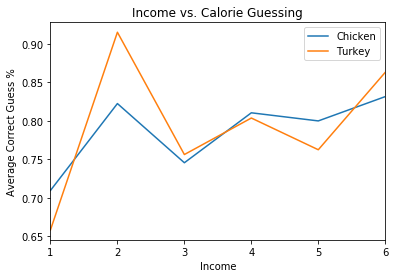

In [77]:
plotting(df2.groupby('income').mean()['calories_chicken_prop'], 'Income vs. Calorie Guessing', 'Income', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('income').mean()['calories_turkey_prop'], 'Income vs. Calorie Guessing', 'Income', 'Average Correct Guess %', ['Chicken','Turkey'])

From the plot, we can conclude that generally, as income increases, people are better at guessing calories.

#### Family Education vs. Calorie Guessing Proportions
father_education, mother_education

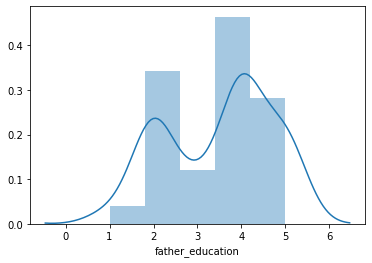

In [11]:
sns.distplot(df2['father_education'].dropna())

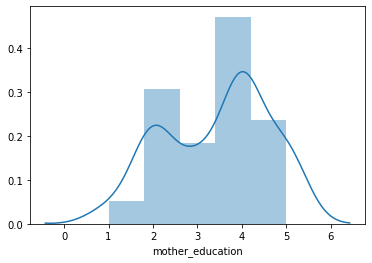

In [12]:
sns.distplot(df2['mother_education'].dropna())

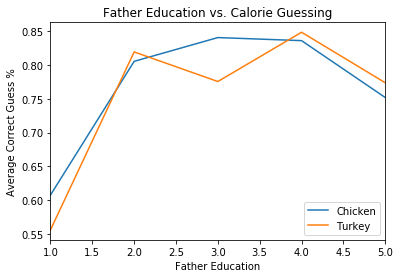

In [13]:
plotting(df2.groupby('father_education').mean()['calories_chicken_prop'], 'Father Education vs. Calorie Guessing', 'Father Education', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('father_education').mean()['calories_turkey_prop'], 'Father Education vs. Calorie Guessing', 'Father Education', 'Average Correct Guess %', ['Chicken','Turkey'])

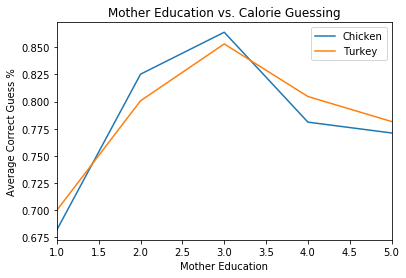

In [14]:
plotting(df2.groupby('mother_education').mean()['calories_chicken_prop'], 'Mother Education vs. Calorie Guessing', 'Mother Education', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('mother_education').mean()['calories_turkey_prop'], 'Mother Education vs. Calorie Guessing', 'Mother Education', 'Average Correct Guess %', ['Chicken','Turkey'])

From these plots, I can conclude that parental education does have an impact on the students ability to correctly guess calories in the chicken & turkey categories. As the parents education level increases, the students are able to better guess the calories. However, this is only true up until the 'graduate' level for fathers and up to the 'some college' level for mothers.

#### Cooking Habits vs. Calorie Guessing

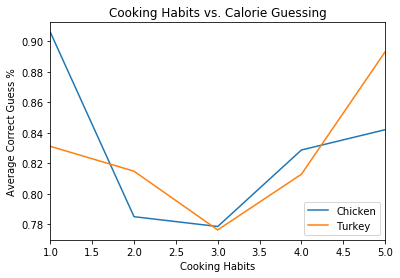

In [15]:
plotting(df2.groupby('cook').mean()['calories_chicken_prop'], 'Cooking Habits vs. Calorie Guessing', 'Cooking Habits', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('cook').mean()['calories_turkey_prop'],  'Cooking Habits vs. Calorie Guessing', 'Cooking Habits', 'Average Correct Guess %', ['Chicken','Turkey'])

From this plot, we can conclude that the frequency of cooking, unless the student is cooking every day (scale of 1 on plot), does not really help in their calorie guessings for chicken or turkey.

#### Living Situation vs. Calorie Guessing

Text(0, 0.5, 'Average Correct Guess %')

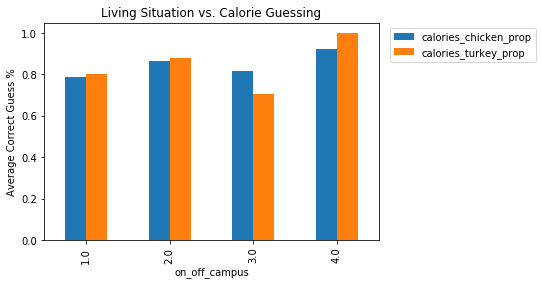

In [16]:
pd.merge(pd.DataFrame(df2.groupby('on_off_campus').mean()['calories_chicken_prop']),pd.DataFrame(df2.groupby('on_off_campus').mean()['calories_turkey_prop']), how='outer', on=['on_off_campus']).plot.bar()
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1))
plt.title('Living Situation vs. Calorie Guessing')
plt.ylabel('Average Correct Guess %')

From looking at the plot above, we conclude that the more independent the student is (not living at home), the better sense of calories they have. For example, those who live in their own homes (4 in the plot), were the best at guessing the calories for turkey and chicken. On the other hand, students who live at home (3 in the plot) did the worst in calorie guessing. 

#### Eating Out Frequency vs. Calorie Guessing

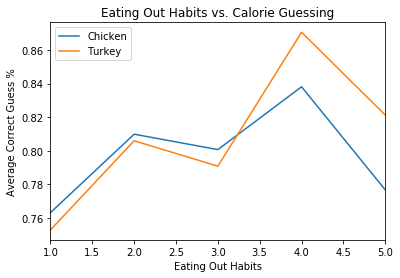

In [17]:
plotting(df2.groupby('eating_out').mean()['calories_chicken_prop'], 'Eating Out Habits vs. Calorie Guessing', 'Eating Out Habits', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('eating_out').mean()['calories_turkey_prop'],  'Eating Out Habits vs. Calorie Guessing', 'Eating Out Habits', 'Average Correct Guess %', ['Chicken','Turkey'])

Interestingly enough, it looks like as people eat out more, the better caloric guessing ability they have. However, this drops down sharply after the '4' eating out habit. People who reported '5' eating out habits eat out everyday. People who eat out everyday are not better at guessing calories than those who eat out less frequently throughout the week.

#### Exercise Frequency vs. Calorie Guessing

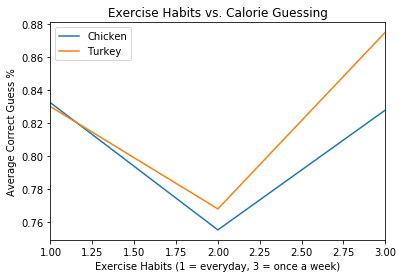

In [18]:
plotting(df2.groupby('exercise').mean()['calories_chicken_prop'], 'Exercise Habits vs. Calorie Guessing', 'Exercise Habits (1 = everyday, 3 = once a week)', 'Average Correct Guess %', ['Chicken','Turkey'])
plotting(df2.groupby('exercise').mean()['calories_turkey_prop'],  'Exercise Habits vs. Calorie Guessing', 'Exercise Habits (1 = everyday, 3 = once a week)', 'Average Correct Guess %', ['Chicken','Turkey'])

From this plot, we cannot conclude that students who exercise more are better at calorie guessing. The usual assumption would be that people who exercise more tend to track their calories more, and thus should be at an advantage when guessing calories for foods. However, this dataset does not include any samples where students report ZERO exercise during the week so we cannot make a thorough investigation. In this plot, all students exercise at least once a week.

#### Conclusion
From all these plots, we can conclude that students who are most conscious of their caloric intake are, on average, those with the highest GPAs, have parents with advanced education, cook everyday, live away from home, eat out during the week, and exercise once a week.

## What types of students will choose unhealthy food options over healthy ones?
Cases studied: 
- Drink: Orange juice vs. Coke
- Breakfast: Oatmeal vs. Donuts

Text(0.5, 0, 'Drink (1=OJ, 2=Coke)')

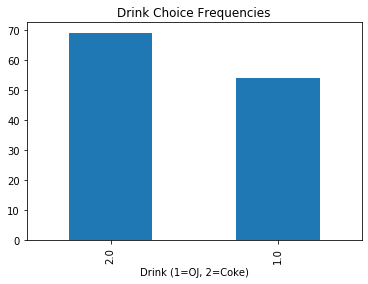

In [19]:
df2['drink'].value_counts().plot(kind='bar')
plt.title('Drink Choice Frequencies')
plt.xlabel('Drink (1=OJ, 2=Coke)')

In [20]:
# biserial correlation between drink choice and numeric variables
# extract numeric variables from df, then get corr.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2.select_dtypes(include=numerics)

corr_columns = df2[['GPA','income','employment','father_education', 'mother_education', 'grade_level', 'eating_out','cook', 'exercise','calories_chicken_prop','calories_turkey_prop','drink']]


In [26]:
drink_correlations = pd.DataFrame([], columns=['Variable','Corr'])

for name in corr_columns.columns.drop('drink'):
    corr_df = corr_columns[[name, 'drink']].dropna()
    corr = stats.pointbiserialr(corr_df[name], corr_df['drink'])[0]
    df2 = pd.DataFrame([[name,corr]],columns=['Variable','Corr'])
    drink_correlations = drink_correlations.append(df2)

# drink_correlations.sort_values('Corr', ascending=False)

From the biserial correlation, which measures the correlation between a binary and dichotomous variable, we conclude that income, mother's education, cooking habits, and exercise habits are the top most correlated variables to drink choices (oj vs. coke). To further investigate, we will make a few plots.

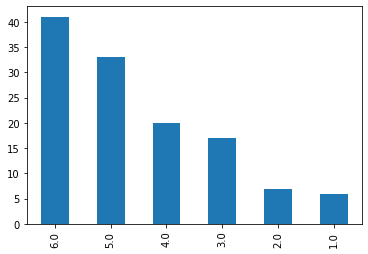

In [32]:
df2['income'].value_counts().plot(kind='bar')

In [60]:
def drink_groupby_plot(variable, title, xlabel):
    d = df2.groupby([variable,'drink']).count().unstack()['GPA']
    d.columns=['orange_juice','coke']
    d.plot.bar()
    plt.title(title)
    plt.xlabel(xlabel)

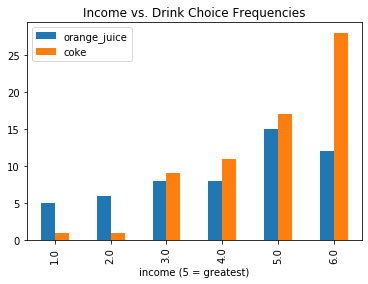

In [87]:
drink_groupby_plot('income', 'Income vs. Drink Choice Frequencies', 'income (5 = greatest)')

In this specific dataset, more students with higher income associate a 'drink' with soda (coke) over orange juice. Students with lower income associate drinks with orange juice over soda.

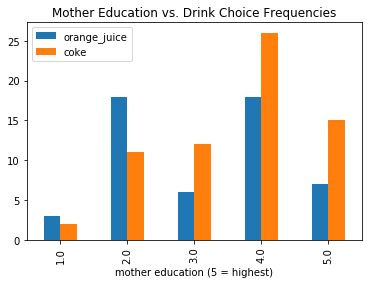

In [86]:
drink_groupby_plot('mother_education', 'Mother Education vs. Drink Choice Frequencies', 'mother education (5 = highest)')

Similarly, in this dataset, more students whose mothers have higher education associate a 'drink' with soda (coke) over orange juice. More students whose mothers have lower education associate drinks with orange juice.

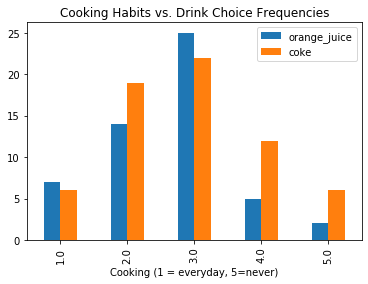

In [85]:
drink_groupby_plot('cook', 'Cooking Habits vs. Drink Choice Frequencies', 'Cooking (1 = everyday, 5=never)')

From looking at this plot, we conclude that people who cook less frequently are more likely to associate a drink with soda over orange juice.

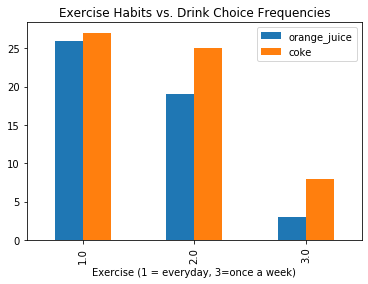

In [84]:
drink_groupby_plot('exercise', 'Exercise Habits vs. Drink Choice Frequencies', 'Exercise (1 = everyday, 3=once a week)')

From this plot, we can safely assume that people who do exercise tend to associate drinks with soda over orange juice. Since this dataset does not include any samples from people who do not exercise, we cannot make any conclusions about the drink associations with people who do not exercise.

#### Gender vs. Drink Choice

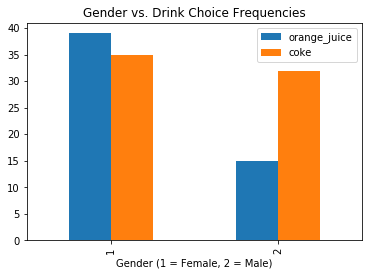

In [83]:
drink_groupby_plot('Gender', 'Gender vs. Drink Choice Frequencies', 'Gender (1 = Female, 2 = Male)')

Interestingly, women are more likely to associate drinks with orange juice whereas men associate drinks with coke. Under the assumption that juice is healthier than coke, I will investigate whether female students also check nutritional facts more than male students.

In [116]:
gender_nutr = food.groupby(['nutritional_check','Gender']).count().unstack()['GPA']
gender_nutr.columns = ['Female','Male']
sums = gender_nutr.sum(axis=1)

In [117]:
gender_nutr['Female'] = gender_nutr['Female'] / sums
gender_nutr['Male'] = gender_nutr['Male'] / sums

Text(0.5, 0, 'nutritional_check (1=never, 5=always)')

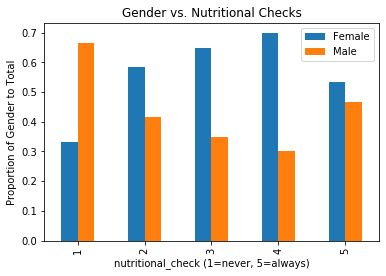

In [121]:
gender_nutr.plot.bar()
plt.title('Gender vs. Nutritional Checks')
plt.ylabel('Proportion of Gender to Total')
plt.xlabel('nutritional_check (1=never, 5=always)')

From this plot, we can conclude that females are generally more 'health conscious,' meaning they check the nutrition facts on food much more likely than men do. This could also be why females in this dataset associate drinks with juie over soda.